#  var = wait + amount transaction

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("operations.csv",parse_dates=[0])

# calculate the wait variable!

In [3]:
import datetime as dt

# Sub-sample is selected
groceries = data[data.categ == "GROCERIES"]

# Transactions are sorted by date
groceries = groceries.sort_values("transaction_date")

# Expenses are converted to positive amounts
groceries["amount"] = -groceries["amount"]

# Wait variable is calculated 
r = []
last_date = dt.datetime.now()
for i,row in groceries.iterrows():
    days = (row["transaction_date"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["transaction_date"]
groceries["wait"] = r
groceries = groceries.iloc[1:,]

# transactions made on the same date are grouped together
# (groceries bought the same day but in 2 different stores)
a = groceries.groupby("transaction_date")["amount"].sum()
b = groceries.groupby("transaction_date")["wait"].first()
groceries = pd.DataFrame([a for a in zip(a,b)])
groceries.columns = ["amount","wait"]

In [7]:
import statsmodels.api as sm

Y = groceries['amount']
X = groceries[['wait']]
X = X.copy() # X will be modified, so a copy is created
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
a,b = result.params['wait'],result.params['intercept']

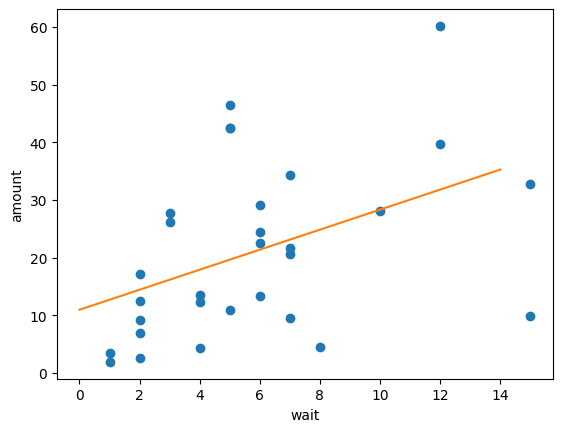

In [10]:
plt.plot(groceries.wait,groceries.amount, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("wait")
plt.ylabel("amount")
plt.show()